In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_pc = pd.read_csv('Datasets/petrol_consumption.csv') #Regression

In [3]:
df_pc

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [5]:
df_pc.shape

(48, 5)

In [6]:
# Manual Selection of Feature
x_pc = df_pc.drop('Petrol_Consumption', axis=1)

y_pc = df_pc['Petrol_Consumption']

In [7]:
x_pc.corrwith(y_pc)

Petrol_tax                     -0.451280
Average_income                 -0.244862
Paved_Highways                  0.019042
Population_Driver_licence(%)    0.698965
dtype: float64

In [8]:
# Apply Non-Linear Regression as corelation is not exist

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Petrol_Consumption', ylabel='Density'>

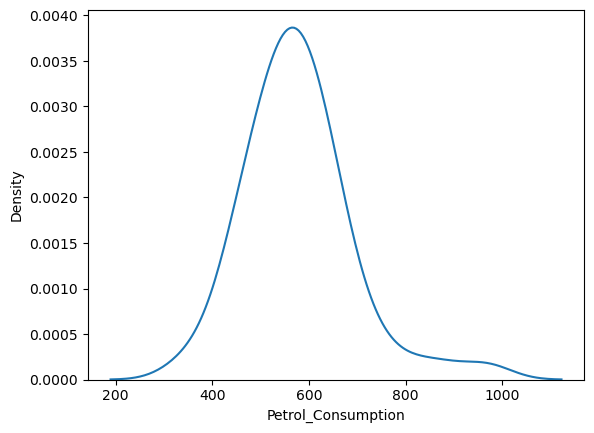

In [9]:
sns.kdeplot(y_pc)

In [10]:
x_pc.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
count,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333
std,0.950770,573.623768,3491.507166,0.055470
min,5.000000,3063.000000,431.000000,0.451000
25%,7.000000,3739.000000,3110.250000,0.529750
50%,7.500000,4298.000000,4735.500000,0.564500
75%,8.125000,4578.750000,7156.000000,0.595250
max,10.000000,5342.000000,17782.000000,0.724000


In [11]:
# Scaling require is data has large diffrence


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_pc_train, x_pc_test, y_pc_train, y_pc_test = train_test_split(x_pc, y_pc, random_state=0)

In [14]:
x_pc_test.shape, x_pc_train.shape

((12, 4), (36, 4))

In [15]:
from sklearn.tree import DecisionTreeRegressor
regr_tree  = DecisionTreeRegressor()
regr_tree.fit(x_pc_train, y_pc_train)

DecisionTreeRegressor()

In [16]:
# Prediction on unseen data
y_pc_pred = regr_tree.predict(x_pc_test)
y_pc_pred

array([547., 464., 628., 628., 628., 640., 628., 540., 414., 464., 414.,
       628.])

In [17]:
result = pd.DataFrame({
    'Actual':y_pc_test,
    'Predicted':y_pc_pred
})
result


,Actual,Predicted
29,534,547.0
4,410,464.0
26,577,628.0
30,571,628.0
32,577,628.0
37,704,640.0
34,487,628.0
40,587,540.0
7,467,414.0
10,580,464.0


In [18]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [19]:
mean_absolute_error(y_pc_test, y_pc_pred)

64.83333333333333

### Visualisation

In [21]:
from sklearn.tree import plot_tree

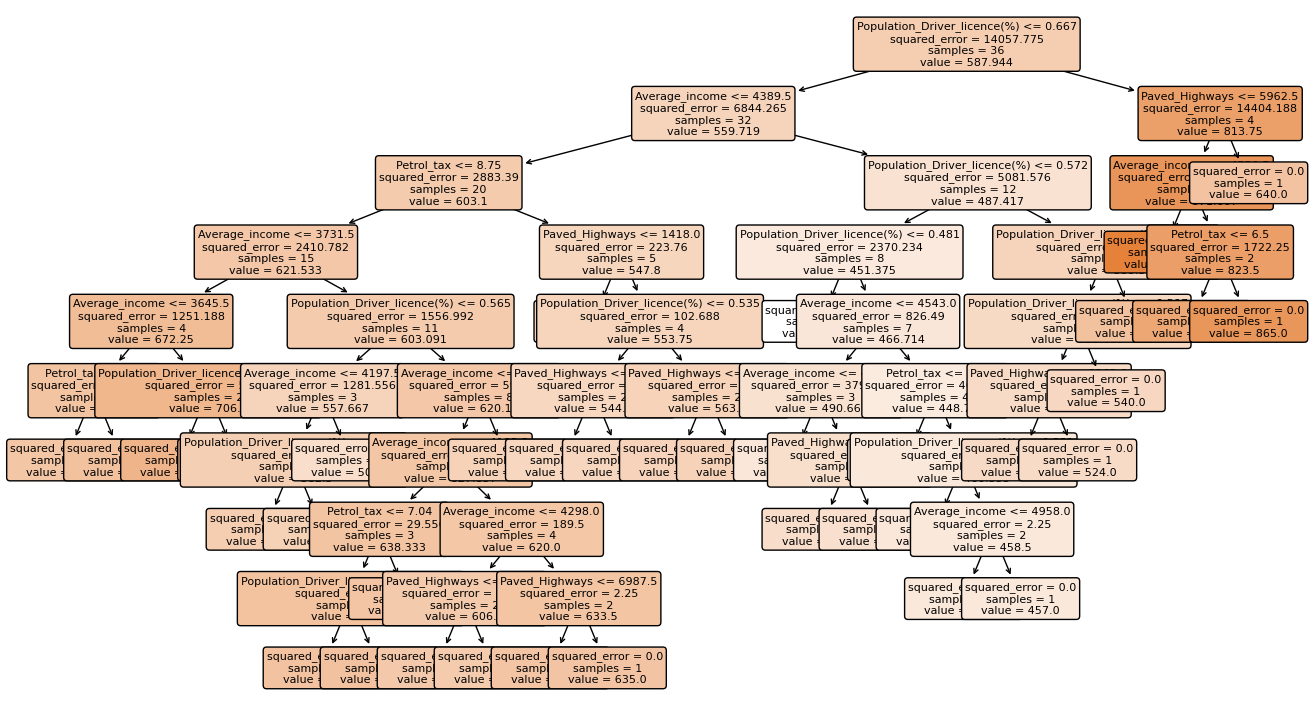

In [22]:
plt.figure(figsize=(16,9))
plot_tree(regr_tree, fontsize = 8, feature_names = x_pc.columns, filled = True, precision = 3, rounded = True);
plt.savefig('images/regre_tree.png')

<BarContainer object of 4 artists>

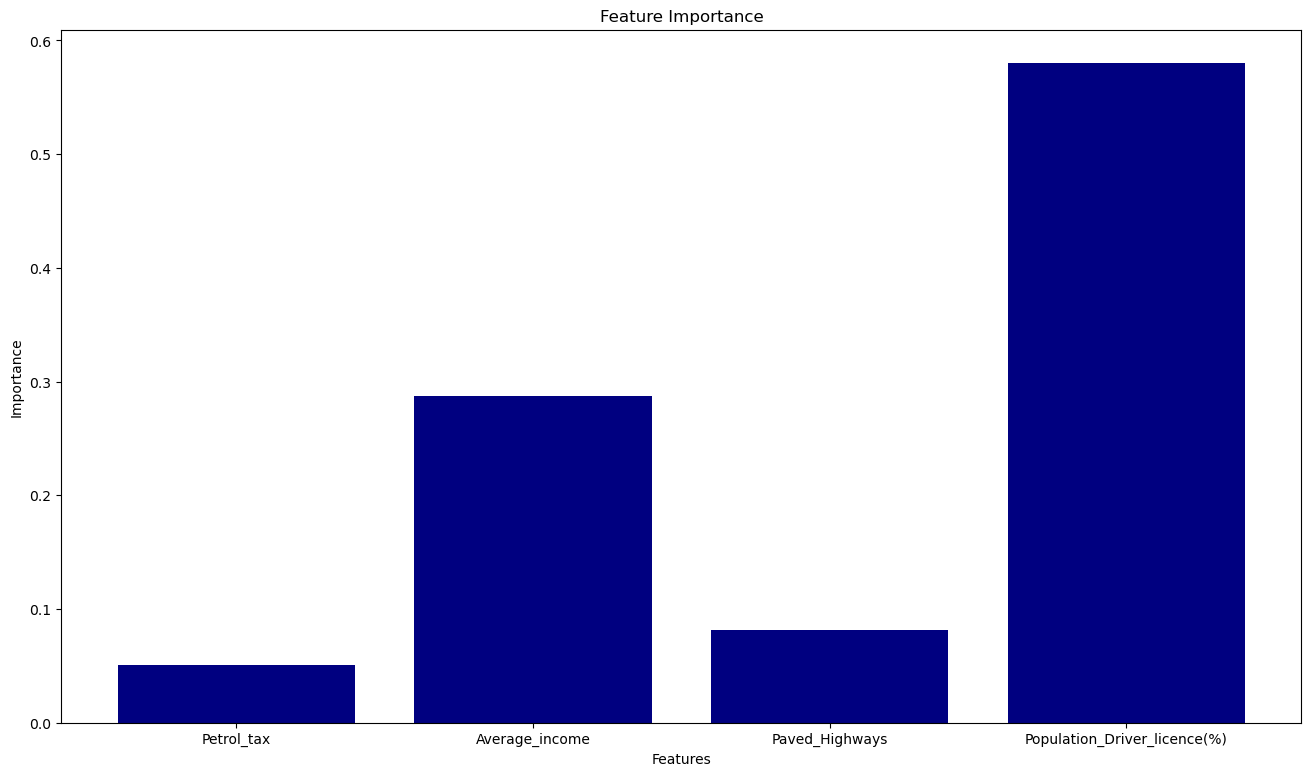

In [24]:
plt.figure(figsize=(16, 9))
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.bar(x_pc.columns, regr_tree.feature_importances_, color = 'navy')

### Predict for new Data

In [39]:
new = pd.DataFrame(data = [[7.3, 4449, 4639, 0.626],
                           [6.4, 5215, 2302, 0.672]],
                           columns=x_pc.columns)
new

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,7.3,4449,4639,0.626
1,6.4,5215,2302,0.672


In [40]:
regr_tree.predict(new)

array([540., 782.])

In [41]:
regr_tree.feature_importances_*100

array([ 5.08269884, 28.74028385,  8.119693  , 58.0573243 ])